# Principal Component Analysis (PCA)

## Introduction

Principal Component Analysis (PCA) is mainly known for **dimensionality reduction** of a dataset.
 - A statistical procedure that uses **orthogonal transformation which converts a large set of correlated variables to a set of uncorrelated variables**, known as principal components (PCs), in a way that the first few retain most of the variation present in all of the original variables.



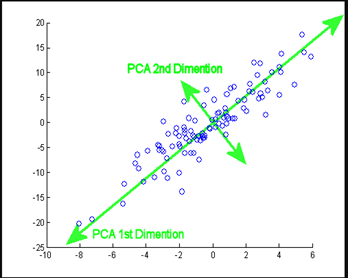




 - It is widely used in exploratory data analysis and in machine learning for predictive models.
 - **unsupervised ML/statistical technique** also known as **general factor analysis**.

## Algorithm 

Steps to obtain principle components from a raw dataset:

1. Get your N-dimensional dataset. 
   - It is best practice to normalize the data before conducting a PCA as unscaled data with different measurement units that can distort the relative comparison of variance across features.
2. Compute the mean for each dimension od the dataset
3. Compute the covariance matrix of the dataset (covariance indicates the level to which two variables vary together)
4. Transform this covariance matrix into eigenvectors and the corresponding eigenvalues.
   - Eigenvectors quantify the direction and 
   - Eigenvalues quantify the magnitude of the variance of the data.
5. Sort the eigenvectors by decreasing eigenvalues and choose those eigenvectors that has the largest eigenvalues 
6. Use this eigenvector matrix to transform your data samples onto the new subspace


## Applications 
- As **Dimensionality Reduction** in ML: A dataset with large number of features can lead to ML model overfitting problem, which reduces the ability to generalize beyond the training dataset. 
   - Reduced dataset also boosts learning rates and lowers compuation costs by removing redundant features. 
   - It can also be seen as a filtering technique for noisy datasets as first principal component expresses most amount of variance and next additional components expresses less variance but more noise. Thus it preserves signal and discards noise.
- As **Ranking Tool** : Each principal component is a weighted linear combination of input features, where weights are according to magnitude and direction of the maximum variance in the dataset.





# Example 

Let's consider a 3-d dataset that we wish to transform to lower dimensions based on PCA technique.

## step-1

In [1]:
from numpy import array
# Get your d-dimensional dataset
DS = array([[90, 60, 90], [90,90,30], [60,60,60], [60,60,90], [30,30,30]])
import seaborn as sns
import pandas as pd
# convert DS array to dataframe
DF = pd.DataFrame(DS,columns=['d1','d2','d3'])
DF

,d1,d2,d3
0,90,60,90
1,90,90,30
2,60,60,60
3,60,60,90
4,30,30,30


## step-2

In [2]:
# Compute the mean for each dimension
print(DF.mean())

d1    66.0
d2    60.0
d3    60.0
dtype: float64


## step-3

In [3]:
# Compute the covariance matrix of the dataset
print(DF.cov())

       d1     d2     d3
d1  630.0  450.0  225.0
d2  450.0  450.0    0.0
d3  225.0    0.0  900.0


#### Note
1. Diagonal values are simply variance (spread between dataset from its mean) of each feature, d3 has largest variance of 900 and d2 has the smallest.


2. off-diagonal elements are covariance between each of them (the metric evaluates how much - to what extent - the variables change together)
   
    - covariance between d1 and d2 is 450, d1 and d3 is 225 i.e. they tend to vary in a positive way.
    
    - covariance between d2 and d3 is zero i.e. there is no predictable relationship between them

## step-4

In [4]:
#Transform this covariance matrix into eigenvectors and the corresponding eigenvalues

#using PCA from sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA().fit(DF)
explained_variance_ev=pca.explained_variance_
explained_variance=pca.explained_variance_ratio_
var_coeff = pca.components_
print('Eigenvectors \n%s' %var_coeff)
print('\nEigenvalues \n%s' %explained_variance_ev)

Eigenvectors 
[[-0.65580225 -0.4291978  -0.62105769]
 [ 0.3859988   0.51636642 -0.7644414 ]
 [ 0.6487899  -0.74104991 -0.17296443]]

Eigenvalues 
[1137.5874413   786.38798335   56.02457535]


## step-5

**Dimenionality Reduction** 

 To decide which eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace **inspect and sort the eigenvalues**
   - The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
  
  
**Explained Variance**

  This helps to answer this question of "how many principal components are we going to choose for our new feature subspace?" 
  - i.e. how much information (variance) can be attributed to each of the principal components.
  
Note: **The choice of PCs is entirely dependent on the tradeoff between dimensionality reduction and information loss**.

[57.45391117683308, 39.71656481542456, 2.829524007742348]


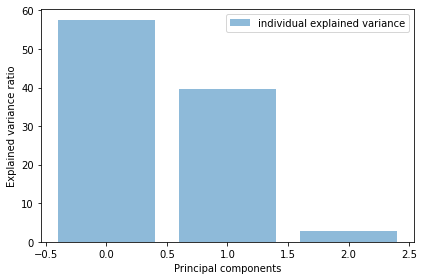

In [5]:
tot = sum(explained_variance_ev)
var_exp = [(i / tot)*100 for i in sorted(explained_variance_ev, reverse=True)]
print(var_exp)
# plot the ditribution of explained variance by PCs
# Amount of variance explained by each component
plt.figure(figsize=(6, 4))

plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

- The plot above clearly shows that maximum variance (somewhere around 57%) can be explained by the first principal component alone. 
- The first and second principal component both contribute to >96% amount of information. 
- Comparatively third component shares very less amount of information as compared to the rest of the Principal components. 

So, we can drop this last component and hence reduce the 3-d feature space to 2-d feature subspace. 

## step-6

In [6]:
# Use this eigenvector matrix to transform your data samples onto the new subspace 
# i.e. from 3-d array to 2-d array 
print(PCA(n_components=2).fit(DF).transform(DF))
#print(PCA(n_components=3).fit(DF).transform(DF))
#print(DF)

[[-34.37098481 -13.66927088]
 [ -9.98345733  47.68820559]
 [  3.93481353  -2.31599277]
 [-14.69691716 -25.24923474]
 [ 55.11654576  -6.45370719]]


# PCA as Ranking System

Eigenvectors 
[[-0.65580225 -0.4291978  -0.62105769]
 [ 0.3859988   0.51636642 -0.7644414 ]
 [ 0.6487899  -0.74104991 -0.17296443]]

 Explained Variance 
[0.57453911 0.39716565 0.02829524]


<AxesSubplot:>

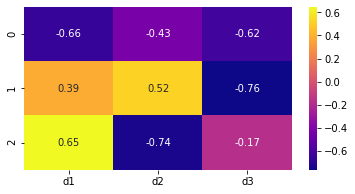

In [7]:
print('Eigenvectors \n%s' %var_coeff)
print('\n Explained Variance \n%s' %explained_variance)

df_comp = pd.DataFrame(var_coeff,columns=DF.columns)
plt.figure(figsize=(6,3))
sns.heatmap(df_comp,cmap='plasma',annot=True,)   

In [8]:
##function to rescale ranks between 0-100
from __future__ import division

def rescale(values, new_min = 0, new_max = 100):
    output = []
    old_min, old_max = min(values), max(values)

    for v in values:
        new_v = (new_max - new_min) / (old_max - old_min) * (v - old_min) + new_min
        output.append(new_v)

    return output

print(rescale([1, 2, 3, 4, 5]))
# [0.0, 25.0, 50.0, 75.0, 100.0]

[0.0, 25.0, 50.0, 75.0, 100.0]


In [13]:
coff_array = [0]*DF.shape[1]
for i in range(DF.shape[1]):
    #print(explained_variance[i],var_coeff[i])
    coff_array = coff_array+explained_variance[i]*(var_coeff[i])
    

print("\n final score equation \n")
 
for i in range(3): 
    print(coff_array[i],"*[",DF.columns[i],"]")


 final score equation 

-0.2051209173786335 *[ d1 ]
-0.06247610303034642 *[ d2 ]
-0.6653258671059266 *[ d3 ]


In [14]:
DF["PCA_Score_all"] = rescale((coff_array[0]*DF['d1'])+(coff_array[1]*DF['d2'])+(coff_array[2]*DF['d3']))


#rank according to pre-determined weights
DF["ScoresRulesBased"] = 0.5*DF['d1']+0.25*DF['d2']+0.1*DF['d3']

#rank as sum of all input values
DF["SUM"] = DF['d1']+DF['d2']+DF['d3']

In [15]:
DF.sort_values(by="PCA_Score_all",ascending=True)

,d1,d2,d3,PCA_Score_all,ScoresRulesBased,SUM
0,90,60,90,0.000000,69.0,240
3,60,60,90,11.374313,54.0,210
2,60,60,60,48.267795,51.0,180
1,90,90,30,70.322555,70.5,210
4,30,30,30,100.000000,25.5,90


**Conclusions**: 
PCA provides a robust methodology for ranking:
- since it does not establish weights a priori, instead, the ranking is based on the principal components which maximize the explanation of the variances.

# References to prior studies

Foolowing studies demostrate the application of PCA as ranking tool

- [Click the link for "PCA ranking to University Ranking system"](https://www.journalijar.com/uploads/864_IJAR-17816.pdf)
- [Click the link for "PCA method for selection of pharmaceutical supply chain"](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0201604)
- [Click here to study "Principal component analysis (PCA) to rank countries on their readiness for e-tail"](https://link.springer.com/article/10.1057/rlp.2008.1)

- [PCA for batting and bowling performance in IPL](http://jse.amstat.org/v21n3/scariano.pdf)


A study with https://en.wikipedia.org/wiki/QS_World_University_Rankings

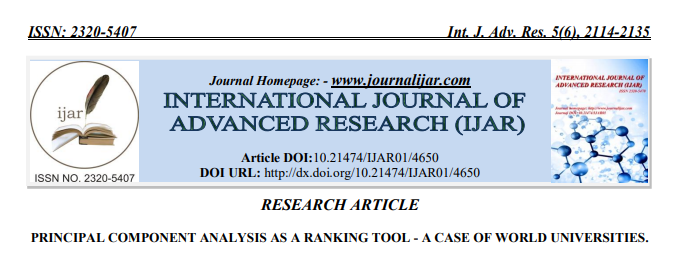

# Compare PCA ranks against QS ranks

In [39]:
import pandas as pd
df_cwur = pd.read_excel("QSwurData.xlsx")
df_cwur.dropna(axis=0,inplace=True)
print(df_cwur.head(1).T)

                                                                  0
Rank in 2019                                                      1
Institution Name        Massachusetts Institute of Technology (MIT)
Academic Reputation                                             100
Employer Reputation                                             100
Faculty Student                                                 100
Citations per Faculty                                          99.8
International Faculty                                           100
International Students                                         94.1
Overall Score                                                   100


Input Variables:-
    
In this demonstration, we adopt the six performance indicator variables according to the QS World university
rankings. According to QSWUR, these six performance variables cover the aspects of research, teaching,
employability and internationalisation.


The variables are explained below:


**Academic Reputation**:-This is measured through a global survey, in which academics identify institutions which
they believe are currently conducting the best work within their respective academic fields. Regional weights are
applied to counter any discrepancies in response rates. Higher values of academic reputation indicate better
performance.

**Employer reputation**:-Just like academic reputation, employer reputation is also based on a global survey. Here,
employers identify universities which they perceive to be producing the best graduates. Unique to QSWUR, this
variable aims to provide the level to which universities are viewed in the job market as reputable. Higher values
indicate better performance.

**Student-to-faculty ratio**:-This represents a measure of the number of academic staff employed relative to the
number of students enrolled. This measure provides information on how a university is best equipped to provide
small class sizes and a good level of individual supervision. Lower values indicate better performance.

**Citations per faculty**:-This variable measures a university’s research impact by counting total citations in relation
to the number of academic faculty members of the university. Scopus, a large database for citations and abstracts
provides such citation counts. Higher values indicate better performance.

**International faculty ratio**:-This reflects an institution’s success in attracting academics from other countries as a
measure of internationalisation. Higher values indicate better performance.

**International student ratio**:-This reflects an institution’s success in attracting academics from other countries as a
measure of internationalisation. Higher values indicate better performance.


<AxesSubplot:>

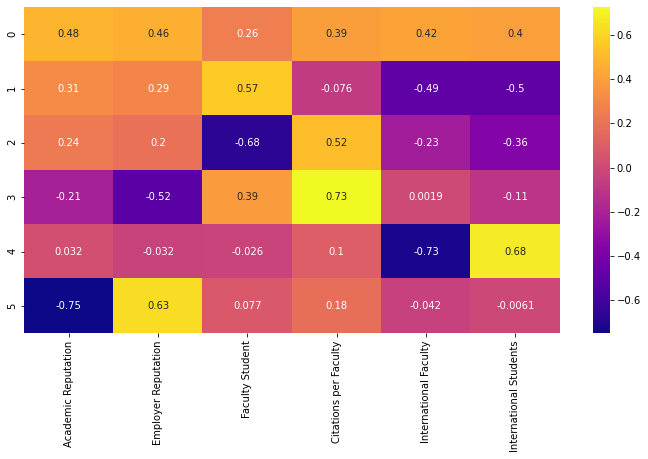

In [41]:
#select input features
df = df_cwur.copy()
df = df[['Academic Reputation',
       'Employer Reputation', 'Faculty Student', 'Citations per Faculty',
       'International Faculty', 'International Students']]

#normalize data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

#pca from sklearn
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
explained_variance=pca.explained_variance_ratio_
var_coeff = pca.components_

#PCs
df_comp = pd.DataFrame(var_coeff,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',annot=True,)  

In [42]:
coff_array = [0]*df.shape[1]
for i in range(df.shape[1]):
    #print(explained_variance[i],var_coeff[i])
    coff_array = coff_array+explained_variance[i]*(var_coeff[i])
    

print("\n final score equation \n")
 
for i in range(df.shape[1]): 
    print(coff_array[i],"*[",df.columns[i],"]")


 final score equation 

0.30858308794615436 *[ Academic Reputation ]
0.29255710961770115 *[ Employer Reputation ]
0.17573895989012575 *[ Faculty Student ]
0.3386162710166736 *[ Citations per Faculty ]
0.06876494172886331 *[ International Faculty ]
0.09815647204040352 *[ International Students ]


In [43]:
df_cwur["PCA_Score_all"] = rescale((coff_array[0]*df['Academic Reputation'])
                              +(coff_array[1]*df['Employer Reputation'])
                              +(coff_array[2]*df['Faculty Student'])
                              +(coff_array[3]*df['Citations per Faculty'])
                              +(coff_array[4]*df['International Faculty'])
                              +(coff_array[5]*df['International Students'])                             
                             )

In [44]:
df_cwur.head(10)

,Rank in 2019,Institution Name,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score,PCA_Score_all
0,1,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,99.8,100.0,94.1,100,100.000000
1,2,Stanford University,100.0,100.0,100.0,98.6,99.8,67.7,98.4,97.639855
2,3,Harvard University,100.0,100.0,98.7,99.6,86.3,62.2,97.4,96.575524
3,5,University of Oxford,100.0,100.0,100.0,84.7,99.7,98.5,97.2,96.315018
4,4,California Institute of Technology (Caltech),97.8,81.2,100.0,100.0,99.4,87.3,96.9,94.654991
5,7,ETH Zurich (Swiss Federal Institute of Technol...,98.4,96.7,85.0,98.4,100.0,98.0,95.9,96.718905
6,6,University of Cambridge,100.0,100.0,100.0,74.2,100.0,97.6,95,93.475419
7,10,UCL (University College London),99.3,98.7,98.1,76.7,99.1,100.0,94.8,93.545948
8,8,Imperial College London,98.6,99.9,99.8,72.1,100.0,100.0,94.1,92.713681
9,9,University of Chicago,99.5,93.7,96.5,78.5,70.2,81.0,92,89.686057


Summary: 
    - QS ranks and PCA ranks are comparable
    - purpose of this study is to demonstrate the application of Principal Component Analysis (PCA) as a ranking tool.

#### PCA Limitations:

*Model performance*: PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.

*Classification accuracy*: Variance based PCA framework does not consider the differentiating characteristics of the classes. Also, the information that distinguishes one class from another might be in the low variance components and may be discarded.

*Outliers*: PCA is also affected by outliers, and normalization of the data needs to be an essential component of any workflow.

*Interpretability*: Each principal component is a combination of original features and does not allow for the individual feature importance to be recognized.

# Thanks !